Random Forest Accuracy: 0.5095
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51       983
           1       0.52      0.51      0.51      1017

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000

XGBoost Accuracy: 0.5115
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       983
           1       0.52      0.54      0.53      1017

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



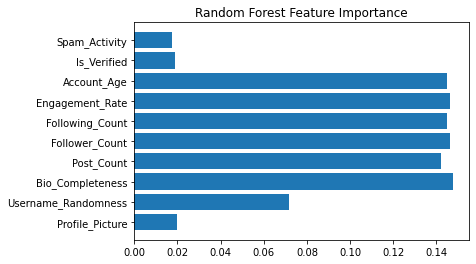

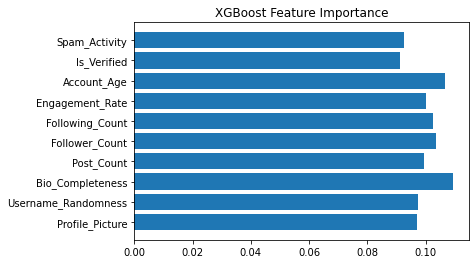

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

file_path = './synthetic_fake_account_dataset.csv'  
data = pd.read_csv(file_path)


X = data.drop(columns=["Output"]) 
y = data["Output"]  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

import matplotlib.pyplot as plt
importances_rf = rf_model.feature_importances_
importances_xgb = xgb_model.feature_importances_

plt.barh(data.columns[:-1], importances_rf)
plt.title("Random Forest Feature Importance")
plt.show()

plt.barh(data.columns[:-1], importances_xgb)
plt.title("XGBoost Feature Importance")
plt.show()
